In [1]:
#!pip install pandas
#!pip install folium
#!pip install matplotlib

In [12]:
import pandas as pd
import folium
import numpy as np
import datetime
import re
import csv
from collections import Counter
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     /home/frabatx/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

# UNIFIED DATASET
Il df che utilizzo dal 20/10/2020 ha il testo giá processato.

In [17]:
#df = pd.read_csv('trento/trento_total.csv',delimiter=',')
df = pd.read_csv('trento/totalProcessed.csv',delimiter=',')
df

,Unnamed: 0,address,day,keywords,latitude,link,list_keywords,location,longitude,month,point,subtitle,text,timestamp,title,year
0,0,"Trento,Piazza del Duomo",8,"['strade', 'trasporti', 'viabilità']",46.067647,https://www.trentotoday.it/attualita/strada-bo...,"['Strade', 'Trasporti', 'Viabilità']","""Piazza del Duomo, Centro storico Trento, Tren...",11.121092,11,"['11.1210924', ' 46.0676474']",La strada sarà chiusa durante le operazioni di...,strada chiusa trasporto alberi natale comune ...,2020/11/08,Arrivano gli alberi di Natale: chiusa la strad...,2020
1,1,"Oltrefersina,Via Fersina",8,"['alpini', 'esercito', 'tamponi']",NaN,https://www.trentotoday.it/attualita/esercito-...,"['Alpini', 'Esercito', 'Tamponi']",NaN,NaN,11,"['', '']",Operazione del Ministero della Difesa in suppo...,arriva trento punto tamponi gestito dall eser...,2020/11/08,Tamponi: anche a Trento arriva l'esercito,2020
2,2,"Oltrefersina,Largo Medaglie d'oro",7,"['bollettino', 'contagi', 'coronavirus']",NaN,https://www.trentotoday.it/cronaca/bollettino-...,"['Bollettino', 'Contagi', 'Coronavirus']",NaN,NaN,11,"['', '']",Non accenna a diminuire il contagio: ecco i da...,accenna appiattirsi linea contagi trentino 25...,2020/11/07,Bollettino coronavirus: 251 nuovi casi in Tren...,2020
3,3,"Dro,Via Monte Casale",7,"['incidenti montagna', 'morti', 'morti in mont...",46.031499,https://www.trentotoday.it/cronaca/federica-ma...,"['Incidenti', 'Montagna', 'Morti', 'Morti', 'I...","""Monte Casale, Via Ferrata Ernesto Che Guevara...",10.927659,11,"['10.9276592', ' 46.031499']","Tragico incidente sulla ""Che Guevara"", probabi...","federica marcolla, medico mamma bambini, la v...",2020/11/07,"Precipita in ferrata: morta Federica Marcolla,...",2020
4,4,"Dro,Via Monte Casale",7,"['ferrate', 'incidenti montagna', 'morti']",46.031499,https://www.trentotoday.it/cronaca/ragazza-mor...,"['Ferrate', 'Incidenti', 'Montagna', 'Morti']","""Monte Casale, Via Ferrata Ernesto Che Guevara...",10.927659,11,"['10.9276592', ' 46.031499']","Drammatico incidente alla ferrata Che Guevara,...",mattinata drammatica monte casale ragazza 32 ...,2020/11/07,"Dro, precipita dalla ferrata per 200 metri e m...",2020
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28676,28676,NaN,9,['lavoro'],0.000000,http://www.trentotoday.it/economia/progettone-...,['Lavoro'],NaN,0.000000,11,"(0.0, 0.0, 0.0)",I sindacati non hanno raggiunto l'intesa con l...,nan,2011/11/09,Progettone: niente accordo sugli stipendi dei ...,2011
28677,28677,NaN,9,['tecnologie'],0.000000,http://www.trentotoday.it/cronaca/internet-con...,['Tecnologie'],NaN,0.000000,11,"(0.0, 0.0, 0.0)",Presenti a Trento oltre cento relatori per dis...,nan,2011/11/09,Le nuove frontiere di internet: due giorni di ...,2011
28678,28678,NaN,9,['religione'],0.000000,http://www.trentotoday.it/cronaca/moschea-gard...,['Religione'],NaN,0.000000,11,"(0.0, 0.0, 0.0)",La comunità musulmana trentina potrà utilizzar...,gardolo centro islamico consiglio stato infat...,2011/11/09,Centro islamico a Gardolo: il Consiglio di Sta...,2011
28679,28679,NaN,9,['trasporti'],0.000000,http://www.trentotoday.it/cronaca/piedibus-mea...,['Trasporti'],NaN,0.000000,11,"(0.0, 0.0, 0.0)","Hanno già aderito trentasei bambini, suddivisi...",grazie disponibilità sedici genitori volontar...,2011/11/09,Piedibus: il servizio gratuito arriva anche a ...,2011


# CHANGE TIMESTAMP FORMAT

# KEYWORDS UNICHE

In [18]:
df["list_keywords"] = df["list_keywords"].apply(lambda x: re.findall('\'([^\']*)\'', x)) # Transform string into list

In [19]:
#Check unique keywords
def uniqueKeyword(listaInDataframe):
    #df_temp = df[df['year']=='2019']
    temp_l = list(listaInDataframe)
    temp_l = [j for i in temp_l for j in i]
    cnt = Counter(temp_l)

    key_value_count = cnt.most_common()
    key_value_count.sort(key= lambda x: x[1], reverse=True)
    total_keywords = [(x,y) for x,y in key_value_count]
    #print(len(total_keywords))
    return total_keywords

total_keywords = uniqueKeyword(df["list_keywords"])
list(total_keywords)

[('Incidenti', 2866),
 ('Argomenti', 2446),
 ('Elezioni', 1003),
 ('Montagna', 986),
 ('Coronavirus', 932),
 ('Lavoro', 899),
 ('Strade', 893),
 ('Morti', 865),
 ('Del', 798),
 ('Furti', 780),
 ('Viabilità', 741),
 ('Scuola', 732),
 ('Trento', 730),
 ('Carabinieri', 656),
 ('Trasporti', 635),
 ('Ambiente', 615),
 ('Basket', 613),
 ('Meteo', 593),
 ('Droga', 570),
 ('Università', 561),
 ('Notizie', 536),
 ('Curiose', 536),
 ('Trentino', 516),
 ('Di', 515),
 ('Incendi', 504),
 ('Sanità', 502),
 ('Sport', 487),
 ('Animali', 475),
 ('Volley', 475),
 ('Comunali', 470),
 ('Vigili', 463),
 ('Polizia', 460),
 ('Fuoco', 460),
 ('Politica', 436),
 ('Traffico', 431),
 ('Comune', 430),
 ('Provincia', 403),
 ('Turismo', 403),
 ('Sci', 401),
 ('Pubblici', 399),
 ('Lavori', 390),
 ('Orso', 374),
 ('Neve', 367),
 ('Agricoltura', 344),
 ('Soccorso', 333),
 ('Sindacati', 323),
 ('Brennero', 320),
 ('Calcio', 315),
 ('Alpino', 307),
 ('Economia', 298),
 ('Casa', 295),
 ('Rifiuti', 293),
 ('Aquila', 292),

# CHORD DIAGRAM

In [20]:
# Creo una lista boleana 
def filter_df(initial_column, key):
    return key in initial_column

In [21]:
keywords = ["Furti","Truffa","Droga","Violenza Sessuale" ,"Truffe","Rapine","Incidenti Stradali" ,"Omicidio","Degrado","Morti" ,"Prostituzione" ,"Coronavirus"];
def correlationDataFrame(keywords, df, stringKeywordsColumnName):
    matrix = []
    for index, key in enumerate(keywords):
        row = [0] * len(keywords)
        boolean = df[stringKeywordsColumnName].apply(lambda x: filter_df(x, key))
        filtered_df = df[boolean]
        super_lista = []
        for lista in filtered_df[stringKeywordsColumnName]:
            super_lista.extend(lista)
        for indice, chiave in enumerate(keywords):
            #print('index = {}, conto = {}, chiave = {}'.format(indice, super_lista.count(chiave), chiave))
            row[indice] = super_lista.count(chiave)
        matrix.append(row)

    #for i in range(len(matrix)):
    #    matrix[i][i] = 0
        
    corrdf = pd.DataFrame(matrix, columns=keywords)
    corrdf.insert(loc=0, column='keys', value=keywords)
    return  corrdf
corrDf = correlationDataFrame(keywords, df, 'list_keywords')
corrDf.to_csv("/home/frabatx/Documents/University/Data_journalism/Project_Article/today_parser/site/src/correlationKeyword.csv",index=False)


# Keywords importanti per il progetto
* furti
* droga
* orso
* violenza
* violenza sessuale
* truffe
* rapine
* incidenti stradali
* omicidio
* degrado
* morti
* prostituzione
* coronavirus

Quello che si potrebbe fare é una wordcloud fatta bene con queste keywords in modo da avere una prima immagine chiarificatrice.
La base da cui parto é quella del sole 24 ore https://lab24.ilsole24ore.com/indice-della-criminalita/.

In [33]:
#Estraggo gli elementi che fanno parte delle argomentazioni che a me interessano
arguments_list = ["Furti","Truffa","Droga","Sessuale" ,"Truffe","Rapine","Stradali" ,"Omicidio","Degrado","Morti" ,"Prostituzione" ,"Coronavirus"];

def keywordsFrequencyTuple(keywords, total_keywords):
    return [(x,y) for x,y in total_keywords if x in keywords]

tupleKey = keywordsFrequencyTuple(arguments_list, total_keywords)
tupleKey

[('Coronavirus', 932),
 ('Morti', 865),
 ('Furti', 780),
 ('Droga', 570),
 ('Stradali', 269),
 ('Truffe', 236),
 ('Omicidio', 190),
 ('Rapine', 174),
 ('Degrado', 140),
 ('Sessuale', 63),
 ('Prostituzione', 46),
 ('Truffa', 37)]

# Istogramma di distribuzione notizie

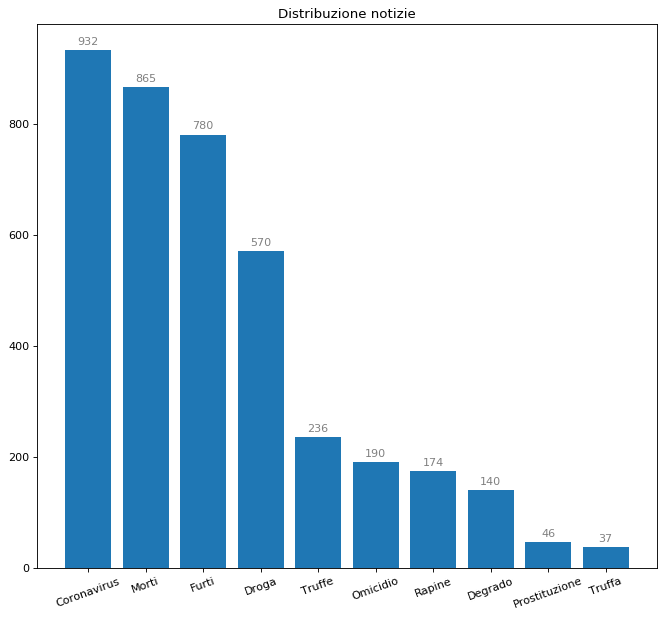

In [23]:
def plotInstogram(tupleKeywords):
    figure(num=None, figsize=(10, 9), dpi=80, facecolor='w', edgecolor='k')

    # Choose the height of the bars
    height = [a_tuple[1] for a_tuple in tupleKeywords]

    # Choose the names of the bars
    bars = [a_tuple[0] for a_tuple in tupleKeywords]
    y_pos = np.arange(len(bars))

    # Create bars
    plt.bar(y_pos, height)
    plt.title('Distribuzione notizie')
    # Create names on the x-axis
    plt.xticks(y_pos, bars, rotation=20)

    style = dict(size=10, color='gray')
    for i in range(0, len(height)):
        plt.text(i, height[i] + 10 , height[i] , ha='center', **style)

    # Show graphic
    plt.show()
plotInstogram(tupleKey)

# ANDAMENTI ANNUALI DELLE KEYWORDS

## Anno

In [40]:
years = ["2011","2012","2013","2014","2015","2016","2017","2018","2019","2020"]
arguments_list =  ["Furti","Truffa","Droga","Sessuale" ,"Truffe","Rapine","Stradali" ,"Omicidio","Degrado","Morti" ,"Prostituzione" ,"Coronavirus"];

# Creazione del dataset da zero
def frequencyKeywordsPerYear(years,total_keywords, keywords, df, stringKeywordsColumn):
   
    columns_year =  ["Furti","Truffa","Droga","Sessuale" ,"Truffe","Rapine","Stradali" ,"Omicidio","Degrado","Morti" ,"Prostituzione" ,"Coronavirus"];
    counter_df_year = pd.DataFrame(columns=columns_year)

    for year in years:
        df_temp = df[(df['year']==int(year))]
        
        temp_l = list(df_temp[stringKeywordsColumn])
        temp_l = [j for i in temp_l for j in i]
        cnt = Counter(temp_l)

        # Creo le tuple 
        key_value_count = cnt.most_common()
        key_value_count.sort(key= lambda x: x[1], reverse=True)
        # Kw totali per l'intero anno
        total_keywords = [(x,y) for x,y in key_value_count]
        # kw importanti per l'intero anno
        important_keywords = [(x,y) for x,y in total_keywords if x in keywords]
        # creazione dizionario ed aggiungo gli elementi che poi andranno a formare la riga del mio dataframe
        dictionary = {}
        dictionary.update({'year': year})
        for tupla in important_keywords:
            dictionary.update({tupla[0]:tupla[1]})
        counter_df_year = counter_df_year.append(dictionary, ignore_index=True)
    counter_df_year.fillna(0, inplace=True)
    return counter_df_year

counter_df_year = frequencyKeywordsPerYear(years, total_keywords, arguments_list, df, 'list_keywords')

counter_df_year.to_csv("/home/frabatx/Documents/University/Data_journalism/Project_Article/today_parser/site/src/trendPerYear1.csv", index=False)
counter_df_year

,Furti,Truffa,Droga,Sessuale,Truffe,Rapine,Stradali,Omicidio,Degrado,Morti,Prostituzione,Coronavirus,year
0,9,0,4,0,3,2,0,3,0,0,0,0,2011
1,122,2,54,0,30,19,1,14,0,1,7,0,2012
2,104,6,51,10,31,22,32,17,14,16,7,0,2013
3,86,8,44,15,18,23,68,10,16,101,4,0,2014
4,91,3,52,5,27,27,60,53,31,101,11,0,2015
5,113,3,61,4,34,20,34,15,17,92,1,0,2016
6,67,0,54,4,22,20,19,19,21,64,3,0,2017
7,88,2,104,11,30,13,12,27,20,117,5,0,2018
8,61,9,95,2,30,16,32,17,12,149,5,0,2019
9,39,4,51,12,11,12,11,15,9,224,3,932,2020


# Timeline plots
Il primo plot prende i dati divisi per anno e li divide per tipologia. Serve per capire le tendenze di un determinato argomento in base all'anno.

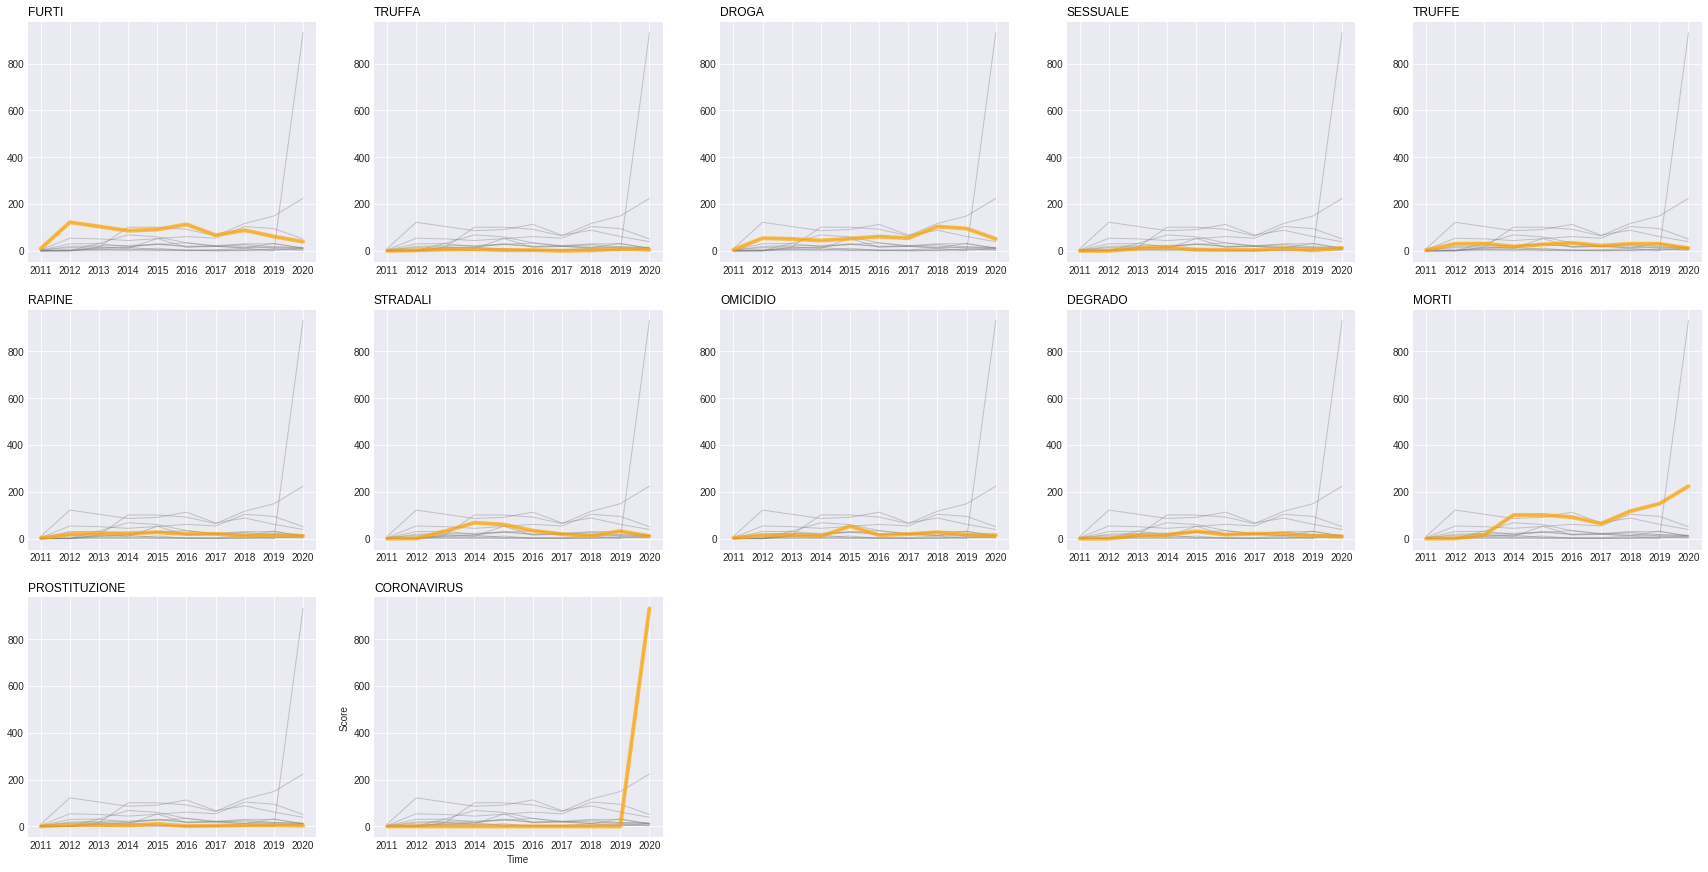

In [41]:
def multilineGridPlotPerYear(counter_df_year):
    #plt.style.use('fivethirtyeight')
    plt.style.use('seaborn-darkgrid')
    plt.figure(figsize=(30, 15))
    # create a color palette
    palette = plt.get_cmap('Set1')

    num1= 0
    for column in counter_df_year.drop('year', axis=1):
        num1+=1
        plt.subplot(3,5, num1)

        # multiple line plot
        for lines in counter_df_year.drop('year', axis=1):
           plt.plot('year', str(lines), data=counter_df_year, marker='', color='grey', linewidth=1, alpha=0.4)

        # Now re do the interesting curve, but biger with distinct color
        plt.plot(counter_df_year['year'], counter_df_year[column], marker='', color = 'orange', linewidth=4, alpha=0.7)

        # Add titles
        plt.title(column.upper(), loc='left', fontsize=12, fontweight=0, color='black' )

    plt.xlabel("Time")
    plt.ylabel("Score")
multilineGridPlotPerYear(counter_df_year)

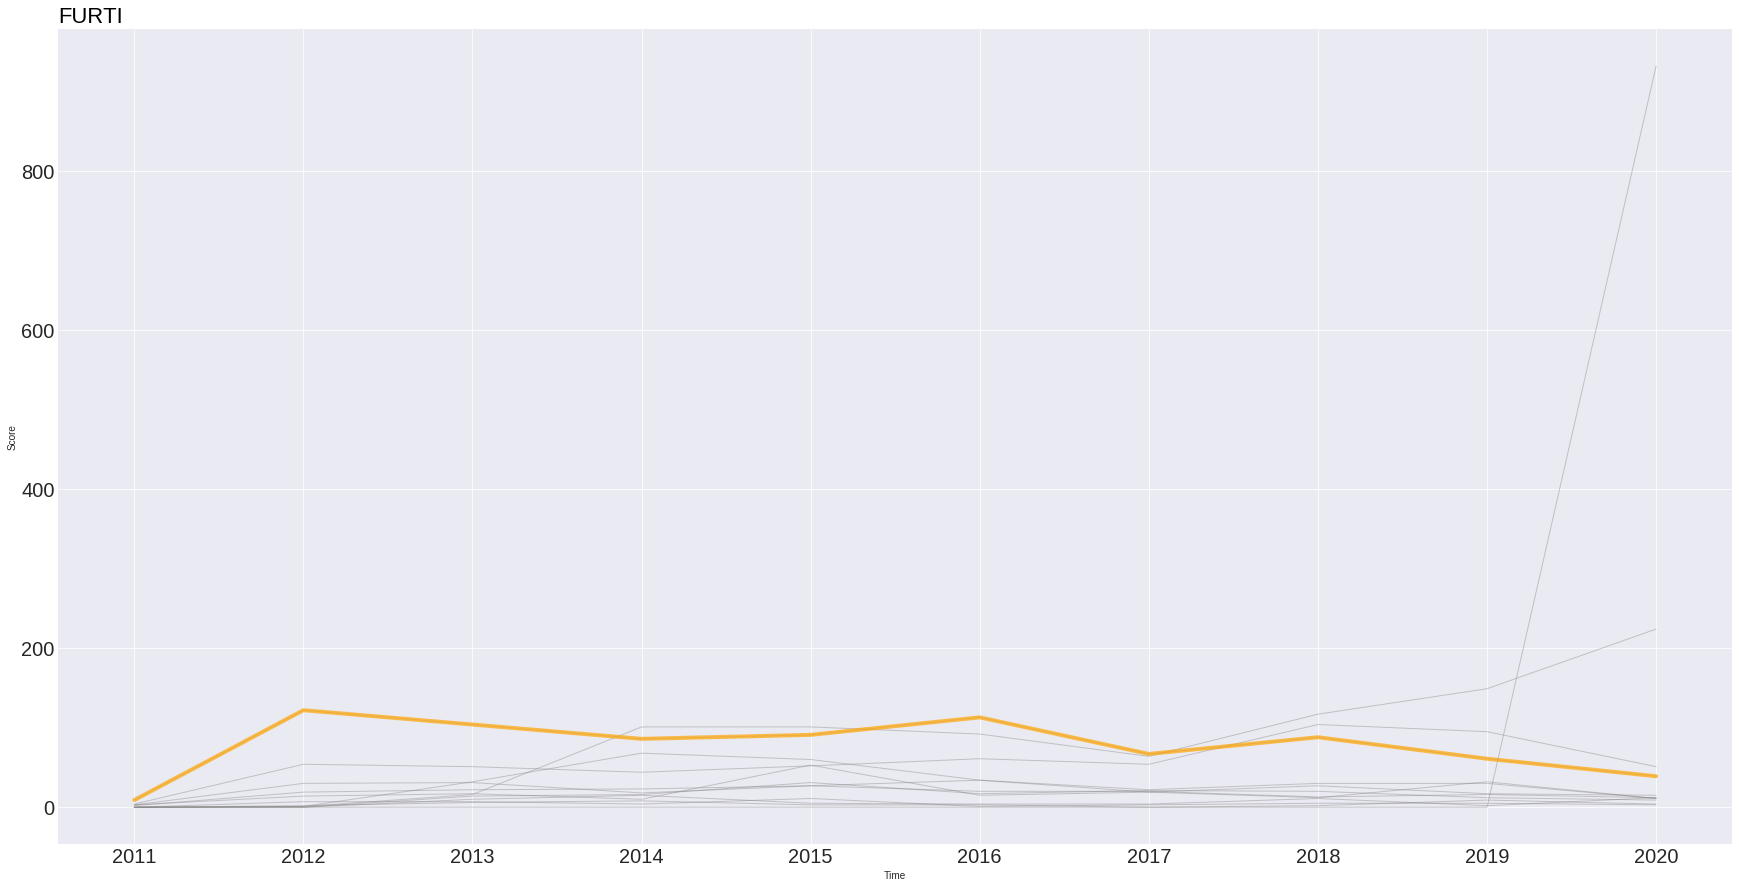

In [43]:
column = 'Furti'
def plotMultilinePerYear(counter_df_yera, column):
    #plt.style.use('fivethirtyeight')
    plt.style.use('seaborn-darkgrid')
    plt.figure(figsize=(30, 15))
    # create a color palette
    palette = plt.get_cmap('Set1')

    # multiple line plot
    for lines in counter_df_year.drop('year', axis=1):
       plt.plot('year', str(lines), data=counter_df_year, marker='', color='grey', linewidth=1, alpha=0.4)

    # Now re do the interesting curve, but biger with distinct color
    plt.plot(counter_df_year['year'], counter_df_year[column], marker='', color = 'orange', linewidth=4, alpha=0.7)

    # Add titles
    plt.title(column.upper(), loc='left', fontsize=22, fontweight=0, color='black' )
    plt.xticks(fontsize= 20)
    plt.yticks(fontsize= 20)
    plt.xlabel("Time")
    plt.ylabel("Score")
    
plotMultilinePerYear(counter_df_year, column)

## Implementing tfidf sui titoli per ogni keywords


In [89]:
# stopwords.words('italian')

Il work flow é quanto segue:
* convertire in lower case
* rimuovere la punteggiatura
* rimuovere gli apostrofi
* rimuovere i cearatteri singoli
* rimuovere le stopwords
* rimuovere la punteggiatura dalle keywords

Calcolare il TFIDF:
* calcolare il tfidf del body
* calcolare il tfidf dei titoli
* moltiplicare il body per alpha
* iterare per ogni tfidf per ogni documento:
    * se il token é nel body, replace il body value con il valore del titolo

# Preprocessing

In [13]:
def lowercase(data):
    return np.char.lower(data)

def titlestring(data):
    return str.title(data)

def removestopwords(data):
    personal_stopwords = "di in il un che qui la fa chiede già ogni però vie per che sono del una due \
    della hanno ha si le con da dei ed nel al dell non all alla stati nella ad dopo anche gli tre era ma\
    anni dal ai delle segno all poco prima ora state giorni corso altri porta oltre scorso dai parte posto\
    l d dell tra 30 dro cinque sembra ancora oggi anni "
    personal_stopwords = personal_stopwords.split(' ')
    
    new_text = ""
    for word in data.split(" "):
        if word not in stopwords.words('italian') and word not in personal_stopwords:
            new_text = new_text + " " + word
    return new_text

def remove_punctuation(data):
    symbols = "!\"#$%&()*+-./:;<=>?@[\]^_`{|}~\n"
    for i in symbols:
        data = np.char.replace(data, i, ' ')
    return data

def remove_apostrophe(data):
    return np.char.replace(data, "'", " ")

def remove_single_character(data):
    new_text = ""
    for w in data.split():
        if(len(w) > 1):
            new_text = new_text + " " + w
    return new_text

def preprocessing(data, stopwordControl = True):
    
    #print(data)
    if(stopwordControl):
        print("5) Lowercase")
        data = data.apply(lambda x : lowercase(str(x)))
        print("4) Stopwords")
        data = data.apply(lambda x : removestopwords(str(x)))
    else:
        print("4) Titlecase")
        data = data.apply(lambda x : titlestring(str(x)))
    #print(data)
    print("3) Punctualization")
    data = data.apply(lambda x : remove_punctuation(str(x)))
    #print(data)
    print("2) Apostrophe")
    data = data.apply(lambda x : remove_apostrophe(str(x)))
    #print(data)
    print("1) Single character")
    data = data.apply(lambda x : remove_single_character(str(x)))
    #print(data)
    print("0) Finish")
    return data

In [14]:
df = pd.read_csv('trento/total.csv')
#print("Preprocessing title")
#df["title"] = preprocessing(df['title'])
print("Preprocessing body")
df["text"] = preprocessing(df['text'])

Preprocessing body
5) Lowercase
4) Stopwords
3) Punctualization
2) Apostrophe
1) Single character
0) Finish


In [15]:
print("Preprocessing keywords")
df["list_keywords"] =  preprocessing(df['list_keywords'], False).apply(lambda x: str.split(x))
df["list_keywords"]

Preprocessing keywords
4) Titlecase
3) Punctualization
2) Apostrophe
1) Single character
0) Finish


0                           [Strade, Trasporti, Viabilità]
1                              [Alpini, Esercito, Tamponi]
2                       [Bollettino, Contagi, Coronavirus]
3        [Incidenti, Montagna, Morti, Morti, In, Montagna]
4                    [Ferrate, Incidenti, Montagna, Morti]
                               ...                        
28676                                             [Lavoro]
28677                                         [Tecnologie]
28678                                          [Religione]
28679                                          [Trasporti]
28680                                            [Spaccio]
Name: list_keywords, Length: 28681, dtype: object

In [16]:
df.to_csv("trento/totalProcessed.csv")
#df = pd.read_csv('trento/dfTextProcessed3.csv',delimiter=',')

##### TODO
il tfidf che segue l'ho preso da questa guida https://towardsdatascience.com/tf-idf-for-document-ranking-from-scratch-in-python-on-real-world-dataset-796d339a4089

In [44]:
def important_words(lista):
    for key in lista:
        boolean_filter = df['keywords'].str.contains(key)
        df_temp = df[boolean_filter]
        #TFIDF
        vectorizer = TfidfVectorizer()
        vectors = vectorizer.fit_transform(df_temp['text'].values.astype('U'))
        transformed_documents_as_array = vectors.toarray()
        feature_names = vectorizer.get_feature_names()
        dense = vectors.todense()
        denselist = dense.tolist()
        df_filtered = pd.DataFrame(denselist, columns=feature_names)
        # Sorting sulle colonne con valori piú alti
        s = df_filtered.sum(axis =0)
        best_words = df_filtered[s.sort_values(ascending=False).index[:100]].columns.to_list()
        print("Best words for {} keyword: {}".format(key.upper(), best_words))
        return df_filtered
        

# TFIDF KEYWORDS STRING


In [46]:
arguments_list = [ 'furti','droga','orso','violenza','violenza sessuale' ,'truffe','rapine','incidenti stradali' ,'omicidio','degrado','morti' ,'prostituzione']
header = ["key", "value"]
path = "/home/frabatx/Documents/University/Data_journalism/Project_Article/today_parser/site/src/wordcloud/"

def tfidfKeywords(argument_list, df, stringColKey,header, path):
   
    for key in arguments_list:
        boolean_filter = df[stringColKey].str.contains(key)
        df_temp = df[boolean_filter]
        #TFIDF
        vectorizer = TfidfVectorizer()
        vectors = vectorizer.fit_transform(df_temp['text'].values.astype('U'))
        transformed_documents_as_array = vectors.toarray()
        feature_names = vectorizer.get_feature_names()
        dense = vectors.todense()
        denselist = dense.tolist()
        df_filtered = pd.DataFrame(denselist, columns=feature_names)
        # Sorting sulle colonne con valori piú alti
        s = df_filtered.sum(axis =0)
        s.sort_values(ascending=False)[0:100].to_csv(path+'{}.csv'.format(key), header = False)
        
        df_s = pd.read_csv(path+'{}.csv'.format(key),delimiter=',', header=None,)
        df_s.columns = header
        df_s.to_csv(path+'{}.csv'.format(key), index=False)
        

tfidfKeywords(arguments_list, df, 'keywords', header, path)